# Run level 2A, 2B and 3 pipelines on Imager data using jwst.pipeline classes

### by Patrick Kavanagh (DIAS, Ireland) January 9th 2017

This notebook demonstrates the execution of the level 2A, 2B and 3 pipelines for Imager data in Python using the jwst.pipeline classes.

For a description of the pipeline classes see:

http://ssb.stsci.edu/doc/jwst_git/docs/pipeline/html/description.html

The file used in this notebook is a MIRISim simulation of a field with 500 point sources and 10 galaxies randomly distributed.

#### Imports

In [1]:
import os, glob

import numpy as np
from astropy.io import fits

import matplotlib.pyplot as plt

#### Set input file:

In [2]:
# set filename
input_file = 'det_image_1_MIRIMAGE_F1130Wexp1.fits'

# extract the basename for use in output files
input_basename = os.path.splitext(input_file)[0]

#### print some information about the input file

In [3]:
# print some info on input file
with fits.open(input_file) as hdulist:
    
    if hdulist[0].header['ORIGIN'] == 'STScI':
        # specific information on instrument/exposure
        identifier = hdulist[0].header['OBS_ID']
        detector = hdulist[0].header['DETECTOR']
        im_filter = hdulist[0].header['FILTER']
        nInts = hdulist[0].header['NINTS']
        nGroups = hdulist[0].header['NGROUPS']
        readPatt = hdulist[0].header['READPATT']
        expTime = hdulist[0].header['EFFEXPTM']
        subArr = hdulist[0].header['SUBARRAY']
        channel = hdulist[0].header['CHANNEL']
        band = hdulist[0].header['BAND']
        print "ID\t\t\t Detector\t Filter\t subAr\t nInts\t nGrps\t rdPatt\t ExpTime (s)"
        print "--------------------------------------------------------------------------------------------------"
        print "%s\t %s\t %s\t %s\t %d\t %d\t %s\t %0.1f" % (identifier,detector,im_filter,subArr,nInts,nGroups,readPatt,expTime)
        print "\n\n"
            
    else:
        # specific information on instrument/exposure
        detector = hdulist[0].header['DETECTOR']
        im_filter = hdulist[0].header['FILTER']
        nInts = hdulist[0].header['NINTS']
        nGroups = hdulist[0].header['NGROUPS']
        readPatt = hdulist[0].header['READPATT']
        expTime = hdulist[0].header['EFFEXPTM']
        subArr = hdulist[0].header['SUBARRAY']
        print "ID\t Detector\t Filter\t subAr\t nInts\t nGrps\t rdPatt\t ExpTime (s)"
        print "--------------------------------------------------------------------------------------------------"
        print "MIRISim\t %s\t %s\t %s\t %d\t %d\t %s\t %0.1f" % (detector,im_filter,subArr, nInts,nGroups,readPatt,expTime)
        print "\n\n"

    # fits extension table
    hdulist.info()
    

ID	 Detector	 Filter	 subAr	 nInts	 nGrps	 rdPatt	 ExpTime (s)
--------------------------------------------------------------------------------------------------
MIRISim	 MIRIMAGE	 F1130W	 FULL	 3	 20	 FAST	 166.5



Filename: det_image_1_MIRIMAGE_F1130Wexp1.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     136   ()      
  1  SCI         ImageHDU        14   (1032, 1024, 20, 3)   float32   
  2  REFOUT      ImageHDU        14   (258, 1024, 20, 3)   float32   
  3  PIXELDQ     ImageHDU        10   (1032, 1024)   int32 (rescales to uint32)   
  4  PIXELDQ_DEF  BinTableHDU     17   29R x 4C   [J, J, 40A, 128A]   
  5  ASDF        ImageHDU         7   (322324727,)   uint8   


#### show the last frame of the first integration

No handlers could be found for logger "jwst.datamodels.util"


<IPython.core.display.Javascript object>


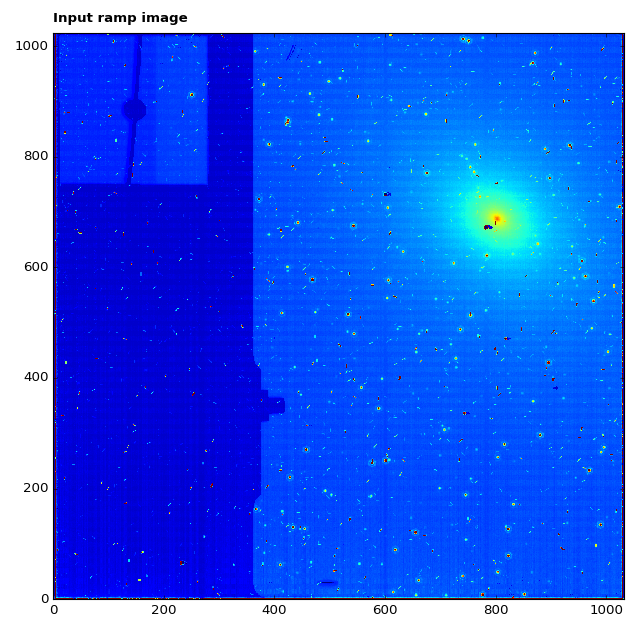

In [4]:
from jwst import datamodels
from matplotlib.colors import LogNorm

# open the input image as a jwst data model
with datamodels.open(input_file) as in_dm:
        
    # plot--------------------------------------
    # show the input ramp image. Note the user 
    # may need to adjust the scale parameters
    # of the plot
    %matplotlib notebook
    fig, axs = plt.subplots(1, 1, figsize=(8, 8))

    # sum the groups in the first integration of the input ramp image and plot
    axs.imshow(in_dm.data[0,-1,:,:], cmap='jet', interpolation='nearest', origin='lower', norm=LogNorm(vmin=1.0e4,vmax=1.3e4))
    axs.annotate('Input ramp image', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
    axs.set_axis_bgcolor('black')

    plt.tight_layout()
    plt.show()

### Level 2A pipeline (ramps-to-slopes)

#### import the level 2A pipeline class and print description

In [5]:
from jwst.pipeline import SloperPipeline
print SloperPipeline.__doc__

The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  


    SloperPipeline: Apply all calibration steps to raw JWST
    ramps to produce a 2-D slope product. Included steps are:
    dq_init, saturation, ipc, superbias, refpix, rscd, lastframe,
    linearity, dark_current, persistence, jump detection, and ramp_fit.

    


For MIRI, the steps in order are: dq_init, saturation, ipc, linearity, RSCD, lastframe, dark_current, refpix, persistence (no-op), jump, ramp_fitting

#### run pipeline

In [6]:
SloperPipeline.call(input_file, output_file='%s_rate.fits' % input_basename)

2017-02-16 16:43:28,852 - stpipe.SloperPipeline - INFO - SloperPipeline instance created.
2017-02-16 16:43:28,853 - stpipe.SloperPipeline.ipc - INFO - IPCStep instance created.
2017-02-16 16:43:28,855 - stpipe.SloperPipeline.saturation - INFO - SaturationStep instance created.
2017-02-16 16:43:28,857 - stpipe.SloperPipeline.rscd - INFO - RSCD_Step instance created.
2017-02-16 16:43:28,859 - stpipe.SloperPipeline.ramp_fit - INFO - RampFitStep instance created.
2017-02-16 16:43:28,860 - stpipe.SloperPipeline.linearity - INFO - LinearityStep instance created.
2017-02-16 16:43:28,863 - stpipe.SloperPipeline.jump - INFO - JumpStep instance created.
2017-02-16 16:43:28,864 - stpipe.SloperPipeline.refpix - INFO - RefPixStep instance created.
2017-02-16 16:43:28,866 - stpipe.SloperPipeline.lastframe - INFO - LastFrameStep instance created.
2017-02-16 16:43:28,867 - stpipe.SloperPipeline.dq_init - INFO - DQInitStep instance created.
2017-02-16 16:43:28,869 - stpipe.SloperPipeline.dark_current -

#### quick check of output

In [7]:
# set the new level 2A filename
level2A_file = input_basename + '_rate.fits'

# open the level 2A file using astropy fits
with fits.open(level2A_file) as hdulist:

    # print extension table info
    hdulist.info()

    # check the status of each 2A calibration step
    print ""
    print 'Status of 2A calibration steps in output header:'
    stepsCheck = ['S_DQINIT', 'S_SATURA', 'S_IPC', 'S_REFPIX', 'S_RSCD', 'S_LASTFR', 'S_LINEAR', 'S_DARK', 'S_PERSIS', 'S_JUMP', 'S_RAMP']
    for key in stepsCheck:
        print key + ': ' + hdulist[0].header[key]


Filename: det_image_1_MIRIMAGE_F1130Wexp1_rate.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     173   ()      
  1  SCI         ImageHDU         9   (1032, 1024)   float32   
  2  DQ          ImageHDU        10   (1032, 1024)   int32 (rescales to uint32)   
  3  ERR         ImageHDU         8   (1032, 1024)   float32   
  4  ASDF        ImageHDU         7   (4637,)   uint8   

Status of 2A calibration steps in output header:
S_DQINIT: COMPLETE
S_SATURA: COMPLETE
S_IPC: COMPLETE
S_REFPIX: COMPLETE
S_RSCD: COMPLETE
S_LASTFR: COMPLETE
S_LINEAR: COMPLETE
S_DARK: COMPLETE
S_PERSIS: SKIPPED
S_JUMP: COMPLETE
S_RAMP: COMPLETE


### Level 2B pipeline

#### import the level 2B pipeline class and print description

In [8]:
from jwst.pipeline import Image2Pipeline
print Image2Pipeline.__doc__



    CalWebbImage2: Processes JWST imaging-mode slope images from
                   Level-2a to Level-2b.

    Included steps are:
    assign_wcs, flat_field, and photom.

    


The level 2B steps are executed in the order they appear in the description

Note that bkg_subtract requires an association so will not be applied to single files. srctype specifies whether the source is point like or extended. In Build 7, this simply writes the source type keyword without applying an algorithm to make the decision.

#### run pipeline

In [9]:
Image2Pipeline.call(level2A_file, output_file='%s_cal.fits' % input_basename)

2017-02-16 17:35:05,800 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2017-02-16 17:35:05,802 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2017-02-16 17:35:05,804 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2017-02-16 17:35:05,806 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2017-02-16 17:35:06,937 - stpipe.Image2Pipeline.assign_wcs - INFO - Prefetch for CAMERA reference file is 'N/A'.
2017-02-16 17:35:06,938 - stpipe.Image2Pipeline.assign_wcs - INFO - Prefetch for COLLIMATOR reference file is 'N/A'.
2017-02-16 17:35:06,939 - stpipe.Image2Pipeline.assign_wcs - INFO - Prefetch for DISPERSER reference file is 'N/A'.
2017-02-16 17:35:06,940 - stpipe.Image2Pipeline.assign_wcs - INFO - Prefetch for DISTORTION reference file is '/Users/patrickkavanagh/crds_mirror/references/jwst/miri/jwst_miri_distortion_0020.asdf'.
2017-02-16 17:35:06,941 - stpipe.Image2Pipeline.assign_wcs - INFO - Pre

### check of output

The level 2B pipeline for the Imager produces a calibrated level 2B file ending in _cal.fits

We can have a look at this output and the calibrated image

#### fits file extension table and step check

In [10]:
# set the new level 2B filename
level2B_file = input_basename + '_cal.fits'

# open the level 2B file using astropy fits
with fits.open(level2B_file) as hdulist:

    # print extension table info
    hdulist.info()

    # check the status of each 2B calibration step
    print ""
    print 'Status of 2B calibration steps in output header:'
    stepsCheck = ['S_WCS', 'S_FLAT', 'S_PHOTOM']
    for key in stepsCheck:
        print key + ': ' + hdulist[0].header[key]

Filename: det_image_1_MIRIMAGE_F1130Wexp1_cal.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     259   ()      
  1  SCI         ImageHDU         9   (1032, 1024)   float32   
  2  DQ          ImageHDU        10   (1032, 1024)   int32 (rescales to uint32)   
  3  ERR         ImageHDU         8   (1032, 1024)   float32   
  4  AREA        ImageHDU         8   (1024, 1024)   float32   
  5  ASDF        ImageHDU         7   (16904,)   uint8   

Status of 2B calibration steps in output header:
S_WCS: COMPLETE
S_FLAT: COMPLETE
S_PHOTOM: COMPLETE


#### calibrated image

<IPython.core.display.Javascript object>


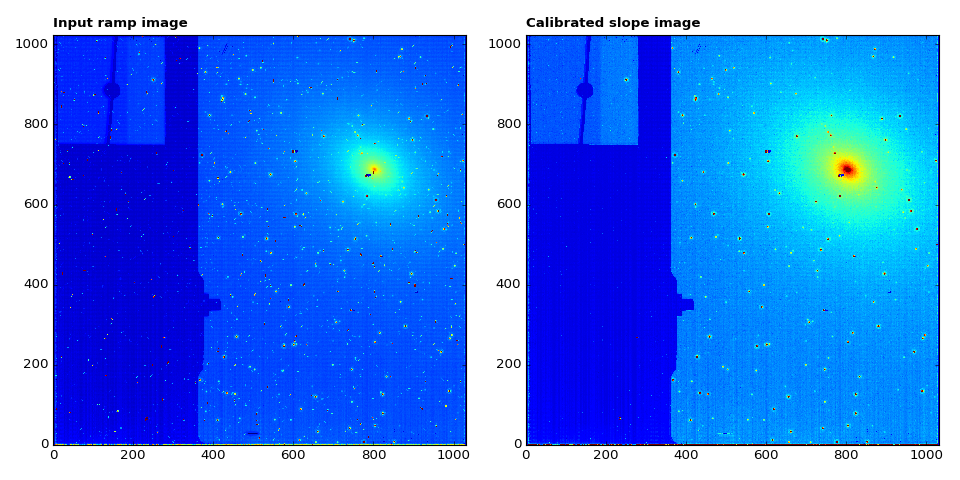

In [11]:
from jwst import datamodels
from matplotlib.colors import LogNorm

# open the input image as a jwst data model
with datamodels.open(input_file) as in_dm:
        
    # open the calibrated image as a jwst data model
    with datamodels.open(level2B_file) as im_dm:

        # plot--------------------------------------
        # show the input ramp image and the calibrated
        # slope image.
        %matplotlib notebook
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))

        # sum the groups in the first integration of the input ramp image and plot
        axs[0].imshow(in_dm.data[0,-1,:,:], cmap='jet', interpolation='nearest', origin='lower', norm=LogNorm(vmin=1.0e4,vmax=1.3e4))
        axs[0].annotate('Input ramp image', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
        axs[0].set_axis_bgcolor('black')
        axs[1].imshow(im_dm.data, cmap='jet', interpolation='nearest', origin='lower', vmin=-3, vmax=30)
        axs[1].annotate('Calibrated slope image', xy=(0.0, 1.02), xycoords='axes fraction', fontsize=12, fontweight='bold', color='k')
        axs[1].set_axis_bgcolor('black')

        plt.tight_layout()
        plt.show()

### Level 3 pipeline

#### import the level 3 pipeline class and print description

In [12]:
from jwst.pipeline import Image3Pipeline
print Image3Pipeline.__doc__



    Image3Pipeline: Applies level 3 processing to imaging-mode data from
                    any JWST instrument.

    Included steps are:
        tweakreg_catalog
        tweakreg
        skymatch
        outlier_detection
        resample
        source_catalog

    


The level 3 steps are executed in the order they appear in the description

Note that the tweakreg, tweakreg_catalog, skymatch and outlier_detection steps require an association so will be skipped for single files.

#### run pipeline

### NOTE THAT THERE IS CURRENTLY A PROBLEM WITH IMAGE3PIPELINE
At the moment there are issues running the level 2B file through the level 3 pipeline. This has been reported to STScI. This notebook will be updated once this problem has been fixed.

In [13]:
Image3Pipeline.call(level2B_file)

2017-02-16 17:35:48,001 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2017-02-16 17:35:48,004 - stpipe.Image3Pipeline.resample - INFO - ResampleStep instance created.
2017-02-16 17:35:48,006 - stpipe.Image3Pipeline.tweakreg_catalog - INFO - TweakregCatalogStep instance created.
2017-02-16 17:35:48,008 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2017-02-16 17:35:48,011 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.
2017-02-16 17:35:48,012 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.
2017-02-16 17:35:48,015 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.
2017-02-16 17:35:49,792 - stpipe.Image3Pipeline.resample - INFO - Prefetch for DRIZPARS reference file is '/Users/patrickkavanagh/crds_mirror/references/jwst/miri/jwst_miri_drizpars_0001.fits'.
2017-02-16 17:35:50,950 - stpipe.Image3Pipeline.outlier_detection - INFO - Prefetch for GAI

AttributeError: No attribute 'resample'